In [8]:
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parent  # because notebook is in notebooks/
pred_path = project_root / "data" / "processed" / "test_predictions_life_expectancy_automl.csv"

preds = pd.read_csv(pred_path)
preds.head()


,iso3,country_name,year,life_expectancy,gdp_per_capita,co2_per_capita,y_actual,y_pred_linear,y_pred_automl
0,MNG,Mongolia,1993,60.824220,1418.065607,4.044,60.824220,62.813935,64.263207
1,NLD,Netherlands,2001,78.190244,41297.319883,10.966,78.190244,76.077297,78.015631
2,GAB,Gabon,2005,62.978000,7130.225058,4.252,62.978000,66.944917,68.120945
3,IRQ,Iraq,2015,69.977000,4440.141893,3.795,69.977000,68.453716,72.221505
4,NAM,Namibia,2009,55.347000,3989.207114,1.280,55.347000,66.208689,64.246512


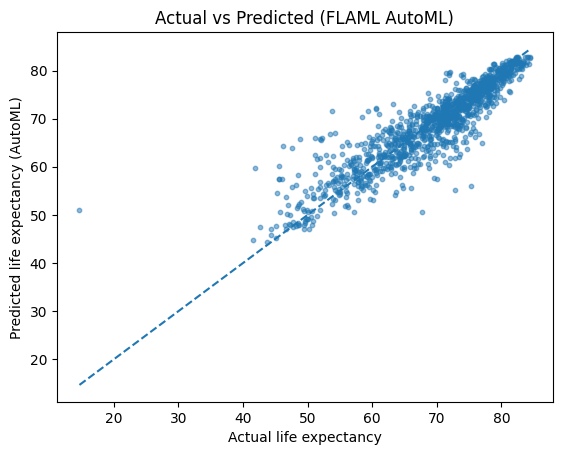

In [9]:
import matplotlib.pyplot as plt

plt.scatter(preds["y_actual"], preds["y_pred_automl"], s=10, alpha=0.5)
plt.xlabel("Actual life expectancy")
plt.ylabel("Predicted life expectancy (AutoML)")
plt.title("Actual vs Predicted (FLAML AutoML)")
plt.plot([preds["y_actual"].min(), preds["y_actual"].max()],
         [preds["y_actual"].min(), preds["y_actual"].max()],
         linestyle="--")
plt.show()


In [10]:
preds["error_linear"] = preds["y_pred_linear"] - preds["y_actual"]
preds["error_automl"] = preds["y_pred_automl"] - preds["y_actual"]

preds[["error_linear", "error_automl"]].describe()


,error_linear,error_automl
count,1242.000000,1242.000000
mean,-0.890664,-0.347176
std,6.829903,3.923162
min,-13.157854,-19.372110
25%,-6.266953,-2.160521
50%,-2.414765,-0.516936
75%,2.928983,1.147441
max,50.343949,36.280660


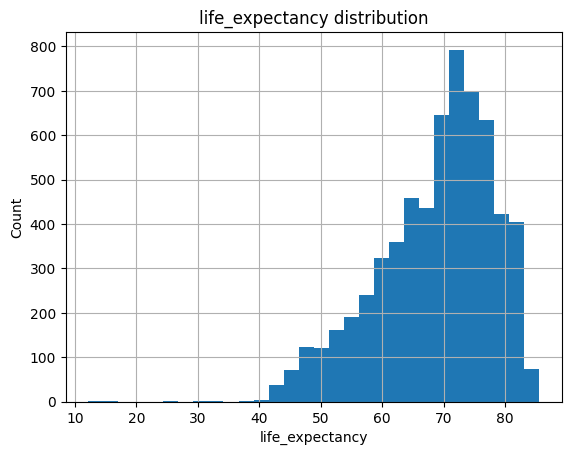

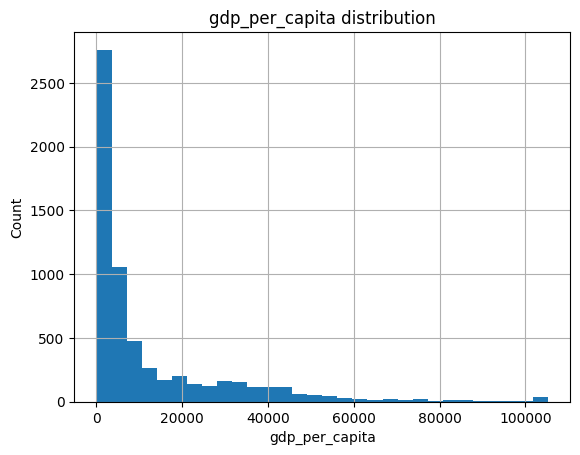

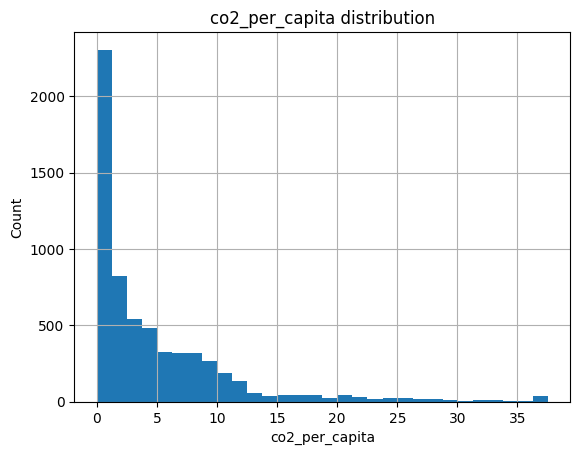

In [11]:
import matplotlib.pyplot as plt
df_clean = pd.read_csv('../data/processed/cleaned_life_expectancy_gdp_co2.csv')
for col in ["life_expectancy", "gdp_per_capita", "co2_per_capita"]:
    df_clean[col].hist(bins=30)
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


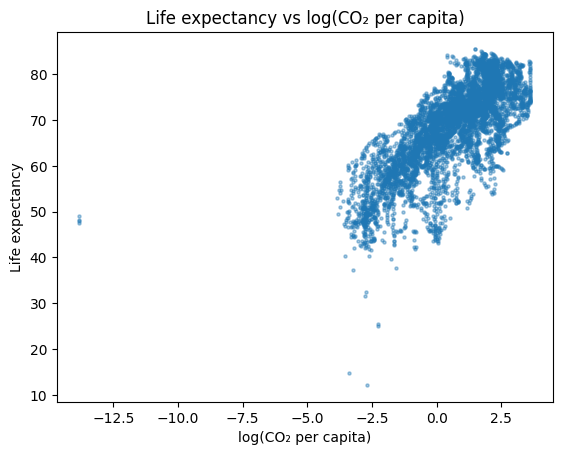

In [12]:
import numpy as np
plt.scatter(np.log(df_clean["co2_per_capita"] + 1e-6), df_clean["life_expectancy"], s=5, alpha=0.4)
plt.xlabel("log(CO₂ per capita)")
plt.ylabel("Life expectancy")
plt.title("Life expectancy vs log(CO₂ per capita)")
plt.show()


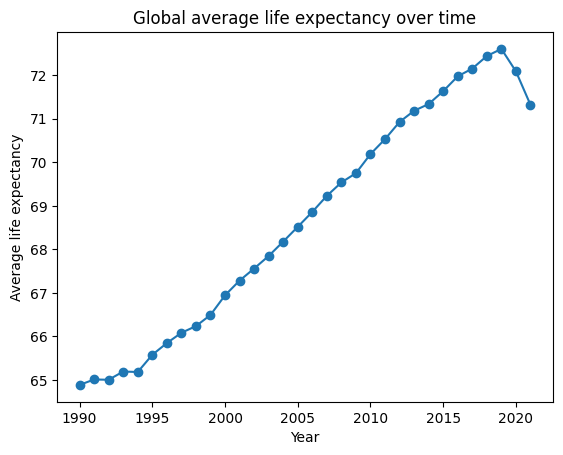

In [13]:
mean_by_year = df_clean.groupby("year")["life_expectancy"].mean().reset_index()

plt.plot(mean_by_year["year"], mean_by_year["life_expectancy"], marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Average life expectancy")
plt.title("Global average life expectancy over time")
plt.show()


In [14]:
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parent
pred_path = project_root / "data" / "processed" / "test_predictions_life_expectancy_automl.csv"
preds = pd.read_csv(pred_path)


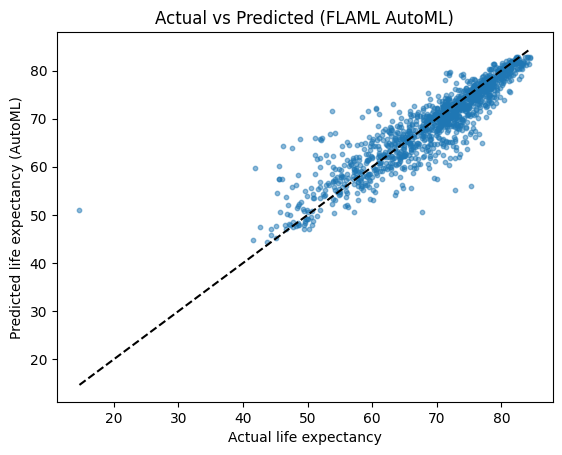

In [15]:
plt.scatter(preds["y_actual"], preds["y_pred_automl"], s=10, alpha=0.5)
min_val = preds[["y_actual", "y_pred_automl"]].min().min()
max_val = preds[["y_actual", "y_pred_automl"]].max().max()
plt.plot([min_val, max_val], [min_val, max_val], "k--")
plt.xlabel("Actual life expectancy")
plt.ylabel("Predicted life expectancy (AutoML)")
plt.title("Actual vs Predicted (FLAML AutoML)")
plt.show()


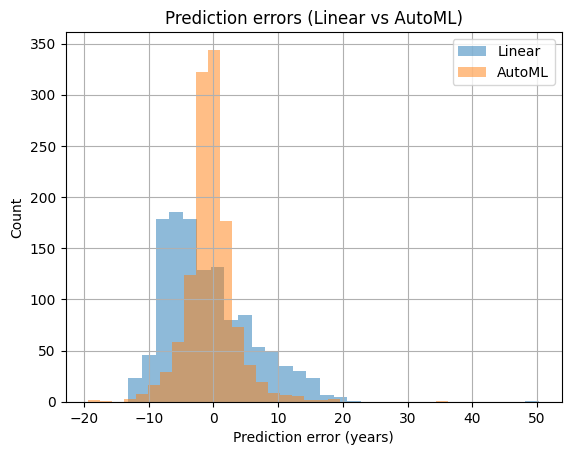

In [16]:
preds["error_linear"] = preds["y_pred_linear"] - preds["y_actual"]
preds["error_automl"] = preds["y_pred_automl"] - preds["y_actual"]

preds[["error_linear", "error_automl"]].describe()

preds["error_linear"].hist(bins=30, alpha=0.5, label="Linear")
preds["error_automl"].hist(bins=30, alpha=0.5, label="AutoML")
plt.legend()
plt.title("Prediction errors (Linear vs AutoML)")
plt.xlabel("Prediction error (years)")
plt.ylabel("Count")
plt.show()


In [19]:
'''#Testing more complicated plots and then later testing shap

import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table: rows = countries, columns = years
heat = preds.pivot_table(
    index="country",
    columns="year",
    values="life_expectancy",
    aggfunc="mean"
)

plt.figure(figsize=(16, 11))
sns.heatmap(
    heat,
    cmap="mako",        # advanced colormap
    linewidths=0.03,
    cbar_kws={"label": "Life Expectancy"},
)

plt.title("Global Life Expectancy by Country and Year (Heatmap)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
'''

'#Testing more complicated plots and then later testing shap\n\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Pivot table: rows = countries, columns = years\nheat = preds.pivot_table(\n    index="country",\n    columns="year",\n    values="life_expectancy",\n    aggfunc="mean"\n)\n\nplt.figure(figsize=(16, 11))\nsns.heatmap(\n    heat,\n    cmap="mako",        # advanced colormap\n    linewidths=0.03,\n    cbar_kws={"label": "Life Expectancy"},\n)\n\nplt.title("Global Life Expectancy by Country and Year (Heatmap)", fontsize=18)\nplt.xlabel("Year")\nplt.ylabel("Country")\nplt.tight_layout()\nplt.show()\n'